# Employee Attrition Project

Employee attrition is the act of leaving or vacating a job naturally.


It is always sad to see or hear that a company that has spent much money in building the capacities of it employees woke up 

one day with a shock from a resignation of one or more of it employees without a tangible named reason. 


This almost always if not all the time cost companies a reduction in production, lost of time 

and money in building or employing another person with similar work experience as the employee 

who has left the company.


It therefore necessitate a company experiencing quite a high rate of employee attrition to 

avoid or reduce the attrition rate by digging deep into matters.

Find out why the employees leave, what are the causes, which employees are likely to leave the company? 

This project is a real practical application of data science methododologies in finding 

solution a company's employee problem using the company's available data on it employees.

It demonstrates a typical way of applying the capabilities of data analysis and machine 

learning in solving an organization's data driven problem. 

# Project Objectives

1. To find which type of employees are more likely leave the company.


2. Predict which employee is likely to leave the company. 

# Processes


1. Data gathering

2. Data importation

3. Data Wrangling

4. Feature Engineering

5. Descritive and prescriptive Analysis (Exploratory Data Analysis)

6. Machine learning Model implementation 

### Importation of  necessary packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data gathering

The data was gathered from the company's data base on its employees. 

It contains variables on employees who have left and employees who still exist  in the company.


# Data Loading

In [2]:
#Loading data on Existing Employees.
data_exist  = pd.read_excel('attrition.xlsx',sheet_name ='Existing employees' )
#Loading data on Employees who have left.
data_left = pd.read_excel('attrition.xlsx',sheet_name ='Employees who have left' )

In [3]:
# Viewing the dimentions of the two datasets
print(data_exist.shape)
print(data_left.shape)

(11428, 10)
(3571, 10)


# Data Wrangling and Feature Engineering

### Creating a new feature to represent attrition to enhance analysis

In [4]:
data_exist['attrition'] = np.full([11428,],'Exist')
data_left['attrition']  = np.full([3571,],'Left')
#Creating numeric variable for attrition
data_exist['attrition_num'] = np.zeros([11428,],dtype = int)
data_left['attrition_num']  = np.ones([3571,],dtype = int)

### Creating numeric variable for salary to enhance analysis

In [5]:
data_exist['salary_num'] = data_exist['salary'].replace({'low':1,'medium':2,'high':3})


In [6]:
data_left['salary_num'] = data_left['salary'].replace({'low':1,'medium':2,'high':3})

In [7]:
data_exist.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition,attrition_num,salary_num
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Exist,0,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Exist,0,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Exist,0,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Exist,0,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Exist,0,1


In [8]:
data_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition,attrition_num,salary_num
0,1,0.38,0.53,2,157,3,0,0,sales,low,Left,1,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Left,1,2
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Left,1,2
3,4,0.72,0.87,5,223,5,0,0,sales,low,Left,1,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,Left,1,1


## Concatenating the data on the existing employees and employees who have left.

In [9]:
data =pd.concat([data_exist,data_left])

In [10]:
data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition,attrition_num,salary_num
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Exist,0,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Exist,0,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Exist,0,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Exist,0,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Exist,0,1


In [11]:
data.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition,attrition_num,salary_num
3566,14995,0.40,0.57,2,151,3,0,0,support,low,Left,1,1
3567,14996,0.37,0.48,2,160,3,0,0,support,low,Left,1,1
3568,14997,0.37,0.53,2,143,3,0,0,support,low,Left,1,1
3569,14998,0.11,0.96,6,280,4,0,0,support,low,Left,1,1
3570,14999,0.37,0.52,2,158,3,0,0,support,low,Left,1,1


In [12]:
data = data.drop('Emp ID', axis = 1)

In [13]:
data.shape

(14999, 12)

#### checking for null values

In [14]:
display(data.isnull().any())

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
attrition                False
attrition_num            False
salary_num               False
dtype: bool

The results above shows that there is no missing values in the data.

### Taking an overview of the overall data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   attrition              14999 non-null  object 
 10  attrition_num          14999 non-null  int32  
 11  salary_num             14999 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 1.4+ MB


After data preparation and feature engineering, the data now contains three categorical and nine non-categorical variables.

# Exploratory Data Analysis

## Exploring the categorical and dummy variables with respect to employee attrition 

In [16]:
cat_var = data.select_dtypes(include= [object])

In [17]:
cat_var.head()

,dept,salary,attrition
0,sales,low,Exist
1,sales,low,Exist
2,sales,low,Exist
3,sales,low,Exist
4,sales,low,Exist


In [18]:
cat_var = data.select_dtypes(include= [object])

### Total proportion of attrition in the Company

In [19]:
Total_proportion = data[data['attrition']== 'Left'].shape[0]/data.shape[0]
Total_proportion

0.2380825388359224

The proportion of employees who have left the company is about 23.8%

## Calculatig the proportion of employees who left per department, salary, work accident and promotion in the last 5 years.

In [20]:
# Defining a function for calculating proportion
def proportion(variable):
    exist= data[data['attrition'] == 'Exist'][variable].value_counts()
    left= data[data['attrition'] == 'Left'][variable].value_counts()
    proportion_rate = left / (exist+left) 
    df = pd.DataFrame({'total':exist+left,'Left':left, 'Exist' :exist, 'proportion':proportion_rate})
    df = df.sort_values(by='proportion', ascending=False)
    print('Proportion of employees who left \n')
    print(df)
    #Plotting graph of rate and total
    df['proportion'].plot(secondary_y = True,mark_right = True, label='rate', title='Rate vs Total - ' + variable)
    df['total'].plot(kind='bar',color=['blue', 'red','green','black','maroon','yellow','slategray','gold','indigo','magenta'],label='total_count')

### Employee attrition per department

Proportion of employees who left 

             total  Left  Exist  proportion
hr             739   215    524    0.290934
accounting     767   204    563    0.265971
technical     2720   697   2023    0.256250
support       2229   555   1674    0.248991
sales         4140  1014   3126    0.244928
marketing      858   203    655    0.236597
IT            1227   273    954    0.222494
product_mng    902   198    704    0.219512
RandD          787   121    666    0.153748
management     630    91    539    0.144444


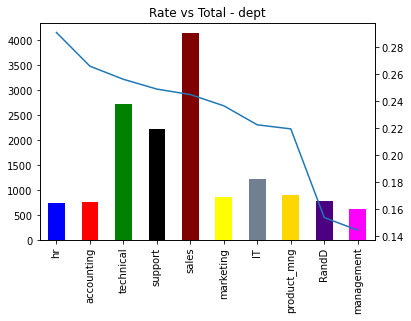

In [21]:
proportion('dept')

The table and the graph above display total number of employees,employees who exist, employees 

who have left, and the proportion of employees who has left in the various departments. 

The Human Resource Department lost **215** employees out of **739** making it the department with the largest attrition rate,**0.29 (29%)**. 

The Accounting Department comes second. With a total membership of **767, 204** of its members 

left representing an attrition rate of **0.266 (26.6%)**.

The Technical Department followed the Accounting closely with an attrition rate of **0.256 (25.6%)**.

The Sales Department had the largest number of employees **(4140)**,with attrition rate of 

**0.245(24.5%)** placing them on the fifth rank.

Management has the least total membership of **630** with the lowest attrition rate of **0.14.** It has 

the lowest attrition rate among the departments.

A close look at the results indicates that employees from the human resource department, 

accounting department and the technical department are more prone to leave the company more 

than employees in other departments since they have high attrition rate comparatively.

Investigation is needed to reveal the reason why it is so.



### Relationship between Employee attriton and Salary

Proportion of employees who left 

        total  Left  Exist  proportion
low      7316  2172   5144    0.296884
medium   6446  1317   5129    0.204313
high     1237    82   1155    0.066289


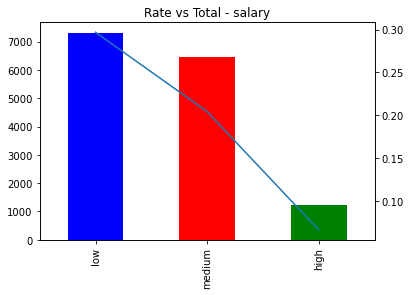

In [22]:
proportion('salary')

The grapth and the output indicate that most of the employees who left the company had their 

salary  falling within the low and medium salary level.


From the output above, about 30% of employees who had low salary left and about 20% of employees 

who had medium salary left whilst just 6% of employees who had high salary left.

This shows that employees with low or medium salary are prone leave the company than those with 

high salary.







### Salary Distribution of employees who has left  per department 

In [23]:
df_1 = data[data['attrition'] == 'Left']
df_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition,attrition_num,salary_num
0,0.38,0.53,2,157,3,0,0,sales,low,Left,1,1
1,0.80,0.86,5,262,6,0,0,sales,medium,Left,1,2
2,0.11,0.88,7,272,4,0,0,sales,medium,Left,1,2
3,0.72,0.87,5,223,5,0,0,sales,low,Left,1,1
4,0.37,0.52,2,159,3,0,0,sales,low,Left,1,1


In [24]:
df2= df_1.pivot_table(index ='dept',columns = 'salary',values ='attrition_num',aggfunc ='count',margins = True ,margins_name = 'Total')
df2['high(%)']=(((df2['high']/df2['Total'])*100)).round(0)
df2['medium (%)']=(((df2['medium']/df2['Total'])*100)).round(0)
df2['low(%)']=(((df2['low']/df2['Total'])*100)).round(0)
df2['medium&low(%)'] = df2['medium (%)']+df2['low(%)']
df2 = df2[['Total','high','medium','low','high(%)','medium (%)','low(%)','medium&low(%)']]
print(  )
print('Distribution of Employees who left from each department per salary level')
df2


Distribution of Employees who left from each department per salary level


salary,Total,high,medium,low,high(%),medium (%),low(%),medium&low(%)
dept,,,,,,,,
IT,273,4,97,172,1.0,36.0,63.0,99.0
RandD,121,4,62,55,3.0,51.0,45.0,96.0
accounting,204,5,100,99,2.0,49.0,49.0,98.0
hr,215,6,117,92,3.0,54.0,43.0,97.0
management,91,1,31,59,1.0,34.0,65.0,99.0
marketing,203,9,68,126,4.0,33.0,62.0,95.0
product_mng,198,6,87,105,3.0,44.0,53.0,97.0
sales,1014,14,303,697,1.0,30.0,69.0,99.0
support,555,8,158,389,1.0,28.0,70.0,98.0


The table above indicates that 95 to 99 percent of employees who left their department were 

within the medium and low salary level.

This supports the previuos finding that less salary is one major reason why the employees leave the company.

Employees who had high salary yet left the company shows that there are non-salary factors that cause employees to leave.

<!-- ## Does salary distrition per department affect the attrition rate of the departmets -->

### Does employee  salary distribution per department affect attrition?

In [25]:
df3 = data.pivot_table(index ='dept',columns = 'salary',values ='attrition_num',aggfunc ='count',margins = True,margins_name = 'Total' )
df3['high(%)']=(((df3['high']/df3['Total'])*100)).round(0)
df3['low (%)']=(((df3['low']/df3['Total'])*100)).round(0)
df3['medium (%)']=(((df3['medium']/df3['Total'])*100)).round(0)
df3['medium&low(%)'] = df3['medium (%)']+df3['low (%)']
df3[['Total','high','medium','low','high(%)','medium (%)','low (%)','medium&low(%)']]
df3.sort_values(by = 'medium&low(%)',ascending = False)

salary,high,low,medium,Total,high(%),low (%),medium (%),medium&low(%)
dept,,,,,,,,
IT,83,609,535,1227,7.0,50.0,44.0,94.0
hr,45,335,359,739,6.0,45.0,49.0,94.0
sales,269,2099,1772,4140,6.0,51.0,43.0,94.0
RandD,51,364,372,787,6.0,46.0,47.0,93.0
support,141,1146,942,2229,6.0,51.0,42.0,93.0
product_mng,68,451,383,902,8.0,50.0,42.0,92.0
technical,201,1372,1147,2720,7.0,50.0,42.0,92.0
Total,1237,7316,6446,14999,8.0,49.0,43.0,92.0
accounting,74,358,335,767,10.0,47.0,44.0,91.0


The table as seen above seeks to help find out whether employees distribution per department 

with respect to salary level determines the department's attrition rate.


Suprisingly,the table indicates that departments with most of it's members falling within the 

medium and low salary level do not necesserily have the higher attrition rate compared to other 

departments.


For instance , the RandD department has **93%** of its members falling within the medium and low 

salary level yet have low attritions rate, **0.15 (15%)** as compared to that of the accounting 

department with attrition rate of **0.266 (26.6%)** having **91%** of its members falling within the 

medium and low salary level.


This finding again suggests that there are other factors that influences the employees 

attrition apart from salary.

## Work accident and employee attrition

Proportion of employees who left 

   total  Left  Exist  proportion
0  12830  3402   9428    0.265160
1   2169   169   2000    0.077916


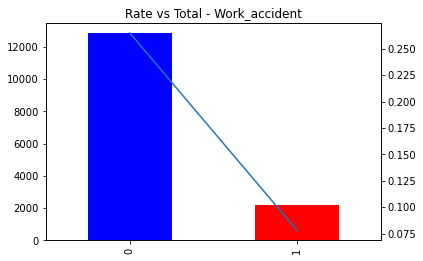

In [26]:
proportion('Work_accident')

Contrary to logics, employees who have not had accident in the company are prone to leave than those who have had accident. This is indicated by an attrition rate of **26.5%** as against **7.8%** respectively. This may be due to some benefits that accident vitims in the company receive or any other unknown reason.

## Promotion in the last 5 years and Attrition

Proportion of employees who left 

   total  Left  Exist  proportion
0  14680  3552  11128    0.241962
1    319    19    300    0.059561


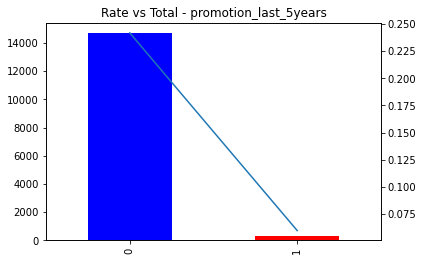

In [27]:
proportion('promotion_last_5years')

Employees who have not gotten promotion in the last five years are prone to leave the company 

than those who had promotion. 

This is also indicated by an attrition rate of **24.2%** as against **5.9%** respectively. This 

implies that there is an association between promotion and employees attrition. 

Employees who have not received promotion for the last five years have a highet likelihood of 

leaving the company as compared to those who received promotion for within the last five years.

## Exploring the numeric variables

In [28]:
num_variable = data.select_dtypes(include= [np.number])
num_variable.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,attrition_num,salary_num
0,0.58,0.74,4,215,3,0,0,0,1
1,0.82,0.67,2,202,3,0,0,0,1
2,0.45,0.69,5,193,3,0,0,0,1
3,0.78,0.82,5,247,3,0,0,0,1
4,0.49,0.60,3,214,2,0,0,0,1


### Defining a function to describe the a variable

In [29]:
def description(variable):    
    exist= pd.DataFrame(data[data['attrition'] == 'Exist'][variable].describe())
    left= pd.DataFrame(data[data['attrition'] == 'Left'][variable].describe())
    print(  )
    print('Description of' ' ' + variable + ' '  'with respect to Attrition')
    print(  )
    print(exist.merge(left,left_index=True, right_index=True,suffixes=('_Exist', '_Left')))
    print(  )
    print(  )
    print('Violin plot of ' + ' ' + variable + ' ' + 'vs Attrition')
    print(  )
    sns.violinplot(x='attrition', y=variable,data=data)

## Satisfaction level and Attrition


Description of satisfaction_level with respect to Attrition

       satisfaction_level_Exist  satisfaction_level_Left
count              11428.000000              3571.000000
mean                   0.666810                 0.440098
std                    0.217104                 0.263933
min                    0.120000                 0.090000
25%                    0.540000                 0.130000
50%                    0.690000                 0.410000
75%                    0.840000                 0.730000
max                    1.000000                 0.920000


Violin plot of  satisfaction_level vs Attrition



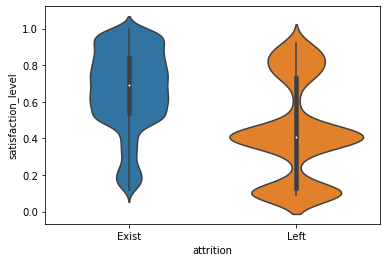

In [30]:
description('satisfaction_level')

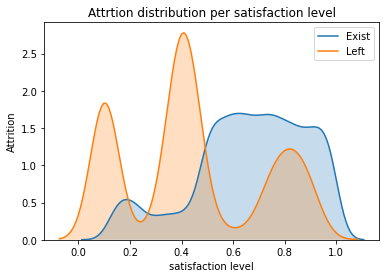

In [31]:
sns.kdeplot(num_variable.satisfaction_level[num_variable['attrition_num']==0], label='Exist', shade=True)
sns.kdeplot(num_variable.satisfaction_level[num_variable['attrition_num']==1], label='Left', shade=True)
plt.xlabel('satisfaction level')
plt.ylabel('Attrition')
plt.title('Attrtion distribution per satisfaction level')
plt.show();



From the ouputs above; the violin plot, and the kernel density plot, it can be ascertained that 

employees who have left the company had less satistion as compared to those who still exist in 

the company.

Employees who stayed have satisfaction level more than 0.67 on the average whilst those who 

left have 0.44.

Both the violin plot and the kernel density plot indicate that most of the employees who left 

had less satisfaction.

This indicates that employees with low satifaction are more prone to leave the company.


### Last Evaluation and Attrition


Description of last_evaluation with respect to Attrition

       last_evaluation_Exist  last_evaluation_Left
count           11428.000000           3571.000000
mean                0.715473              0.718113
std                 0.162005              0.197673
min                 0.360000              0.450000
25%                 0.580000              0.520000
50%                 0.710000              0.790000
75%                 0.850000              0.900000
max                 1.000000              1.000000


Violin plot of  last_evaluation vs Attrition



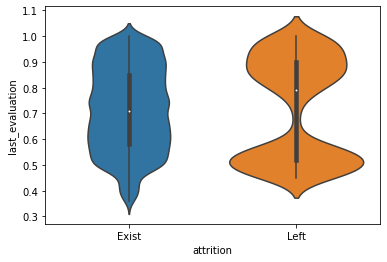

In [32]:
description('last_evaluation')

Here, some employees had very less evaluation and left others had high evaluation but also left.


Both groups have their means satisfaction around 0.71. 


## Number of Projects and Attrition


Description of number_project with respect to Attrition

       number_project_Exist  number_project_Left
count          11428.000000          3571.000000
mean               3.786664             3.855503
std                0.979884             1.818165
min                2.000000             2.000000
25%                3.000000             2.000000
50%                4.000000             4.000000
75%                4.000000             6.000000
max                6.000000             7.000000


Violin plot of  number_project vs Attrition



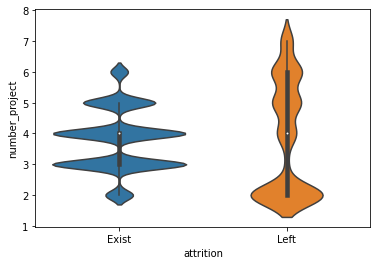

In [33]:
description('number_project')

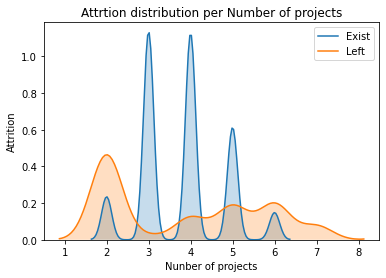

In [34]:
sns.kdeplot(num_variable.number_project[num_variable['attrition_num']==0], label='Exist', shade=True)
sns.kdeplot(num_variable.number_project[num_variable['attrition_num']==1], label='Left', shade=True)
plt.xlabel('Nunber of projects')
plt.ylabel('Attrition')
plt.title('Attrtion distribution per Number of projects')
plt.show();

Comparing means from the descriptive report, employees who left the company do more projects 

than those employees who exist.

The violin plot the density plot indicate that though,some of the employees did few projects, others did quite a high number of projects (7 and 8) compared to those who exist.

This suggests that employees assigned to many projects are prone to leave the company.


## Average monthly hours and Attrition


Description of average_montly_hours with respect to Attrition

       average_montly_hours_Exist  average_montly_hours_Left
count                11428.000000                3571.000000
mean                   199.060203                 207.419210
std                     45.682731                  61.202825
min                     96.000000                 126.000000
25%                    162.000000                 146.000000
50%                    198.000000                 224.000000
75%                    238.000000                 262.000000
max                    287.000000                 310.000000


Violin plot of  average_montly_hours vs Attrition



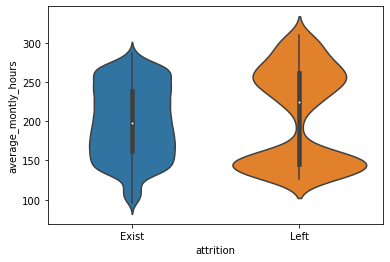

In [35]:
description('average_montly_hours')

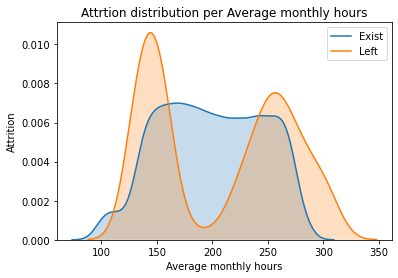

In [36]:
sns.kdeplot(num_variable.average_montly_hours[num_variable['attrition_num']==0], label='Exist', shade=True)
sns.kdeplot(num_variable.average_montly_hours[num_variable['attrition_num']==1], label='Left', shade=True)
plt.xlabel('Average monthly hours')
plt.ylabel('Attrition')
plt.title('Attrtion distribution per Average monthly hours')
plt.show();

Visualization of the distribution employee attrition with respect to average monthly hours 

shows that employees who left spend more hours than those who exist.

This implies that employees who spend many hours working in a month are more prone to leave the 

company.

# Correlational Analysis

Numeric variables were created for attrition and salary during the data preparation and feature engineering to allow for correlational analysis.Correlational analysis is carried out to reveal the relationship between the numeric variable and employee attrition.

In [37]:
num_variable= data.select_dtypes(include= [np.number])

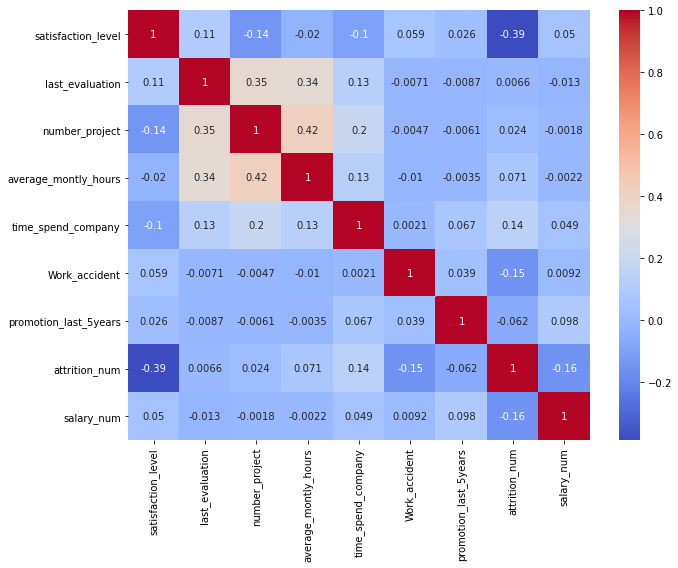

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(num_variable.corr(), cmap='coolwarm', annot=True, ax=ax)
fig.tight_layout()

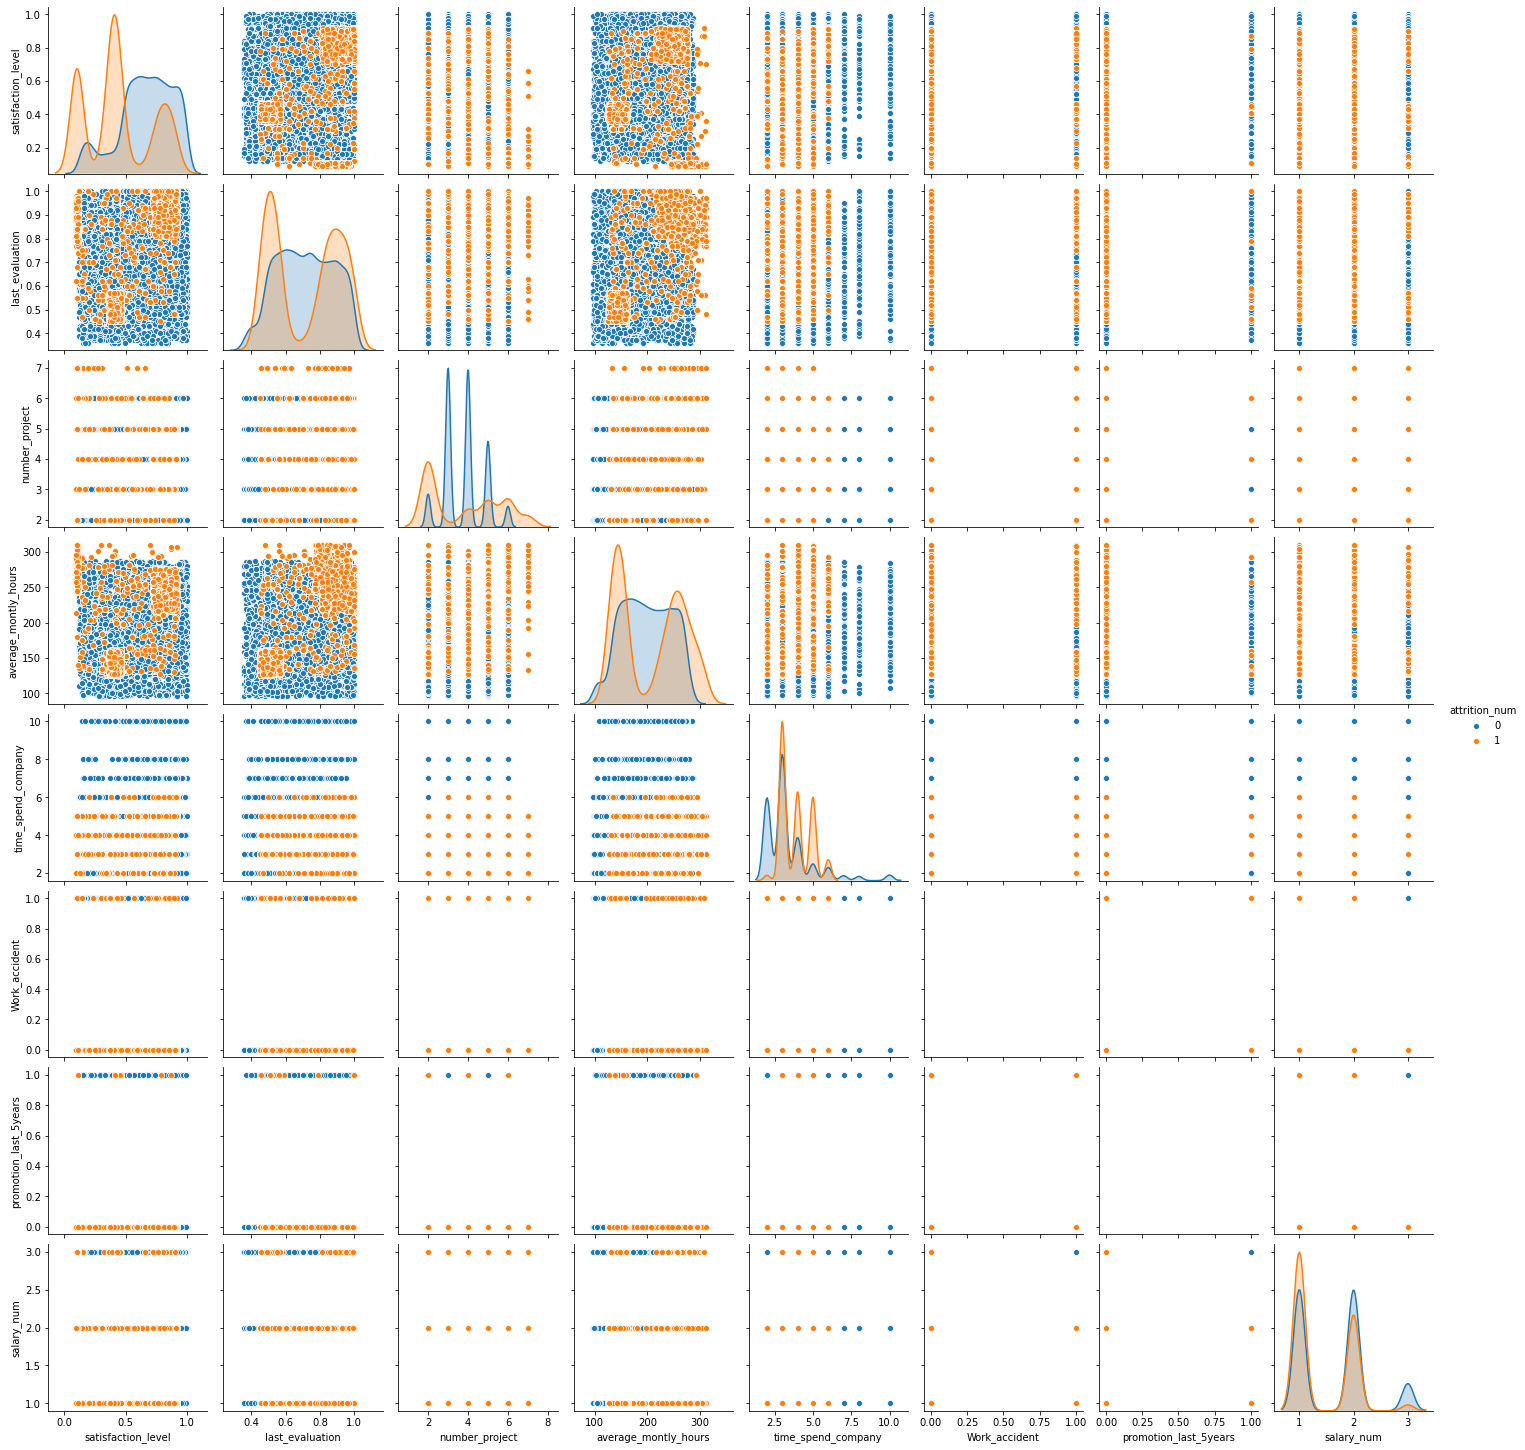

In [39]:
sns.pairplot(data=num_variable, diag_kind='kde',hue = 'attrition_num')
plt.show()          

The correlation heatmap and the output results in addition to previous discriptive analysis 

shows that,satisfaction level,salary,work accident and time spent in the company have 

significant relationship with attrition as compared the other numeric variables.

This implies that significant reasons why an employee may leave the company include  

satisfaction level and  salary problems.

However, the department the employee belongs,time spent in the company and work  accident also 

add up to the reasons why employees are prone to leave the company.

# Predictive Analysis

# Model implementation

## Processing the data for model implementation. 

#### Changing the data into the original dataset

In [40]:
for col in data:
    print(col)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
promotion_last_5years
dept
salary
attrition
attrition_num
salary_num


In [41]:
raw_data = data.drop(['attrition_num','salary_num'],axis =1)

In [42]:
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,0.58,0.74,4,215,3,0,0,sales,low,Exist
1,0.82,0.67,2,202,3,0,0,sales,low,Exist
2,0.45,0.69,5,193,3,0,0,sales,low,Exist
3,0.78,0.82,5,247,3,0,0,sales,low,Exist
4,0.49,0.60,3,214,2,0,0,sales,low,Exist


### Encoding Categorical variables into numeric variables

In [43]:
dataset= pd.get_dummies(raw_data,drop_first=True)
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium,attrition_Left
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### Separating the data into independent variable (X) and dependent variable (y)

In [44]:
X = dataset.drop('attrition_Left',axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,1,0,0,1,0


In [45]:
y = dataset['attrition_Left']

In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: attrition_Left, dtype: uint8

### Splitting the data into train set and test set

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

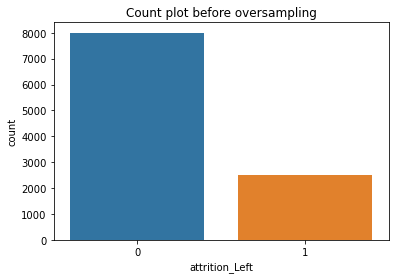

In [49]:
sns.countplot(y_train)
plt.title('Count plot before oversampling')
plt.show()

The graph above shows that there is imbalance in the dataset which might influence the model.
This problem is dealt with by oversampling the training dataset using the imblearn package.


In [50]:
import imblearn
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

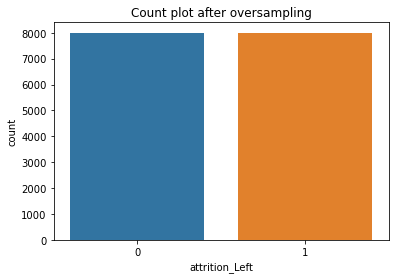

In [51]:
sns.countplot(smote_target)
plt.title('Count plot after oversampling')
plt.show()

Now the train data is balance as can be seen from the count plot above.

### Buiding and selecting  best model with Scikitlearn package.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


### SVC model on scaled data in a pipeline

In [53]:
pipe = Pipeline([('Scaler',MinMaxScaler()),('SVC',SVC())])

param_grid = {'SVC__C':[0.001,0.01,0.1,1,10,100],
            'SVC__gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid,cv =5)
grid.fit(smote_train,smote_target)
print('Best cross-validation acuracy: {:.2f}'.format(grid.best_score_))
print('Best set score: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best parameters:',grid.best_params_)

Best cross-validation acuracy: 0.96
Best set score: 0.96
Best parameters: {'SVC__C': 10, 'SVC__gamma': 10}


From the codes above, the data is scaled using a MinMaxScaler through a pipeline, to enhance the Support vector Classifier to train well.

Grid search cross-validation is used to select the best combination of  'C' and 'gamma' hyperparameters parameters that will 

yield the best resuluts.

With the hyperparameters combination of 'C'=10 and 'gamma'= 10 , the model gave the best cross-validation acuracy of 96%  

and best test score of 96%.


In [54]:
rfc = RandomForestClassifier()
param_grid = {'max_features': [1, 2, 3]}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(smote_train,smote_target)
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best set score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)



Best cross-validation acuracy: 0.98
Best set score: 0.99
Best parameters: {'max_features': 3}


As indicated in the code output above, RandomForestClassifier model implemented through gridsearch cross-validation, yielded 

a cross-validation acuracy of **98%** and best test score of **99%** with max_feature para meter being **3**.

# Comparing the SVC model and the RandomForestClassifier

Considering the best test score of both models, the RandomForestClasssifier is **3%** above that of the SVC model (99 % 

against 96%)


For further comparison in order to select the best model,classification_report was used as shown below. 

In [55]:
RFC = RandomForestClassifier(max_features = 3 )
RFC.fit(smote_train,smote_target)
print('Training Score: {:.2f}'.format(RFC.score(smote_train,smote_target)))
print('Test set score: {:.2f}'.format(RFC.score(X_test,y_test)))


Training Score: 1.00
Test set score: 0.99


In [56]:
y_pred = grid_rfc.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.97      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [57]:
svc_pred = grid.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3429
           1       0.89      0.96      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.96      0.95      4500
weighted avg       0.96      0.96      0.96      4500



From the classification reports shown above, the RandomForestClassification model has a high precision,recall 

and f1-score as compared to that of the Support Vector Classifier hence has been selected as the model to 

predict employee who is most likely to leave the company next time. 


In [58]:
print("Feature importances:\n{}".format(RFC.feature_importances_))

Feature importances:
[0.27911438 0.13358481 0.13306692 0.157185   0.23013199 0.01908224
 0.00331257 0.00362011 0.00230289 0.00189764 0.0037917  0.0018592
 0.00216476 0.00535226 0.00351596 0.00468086 0.00931101 0.00602572]


In [59]:
def visualize(model):
    n_features = smote_train.shape[1]
    plt.figure(figsize = (14,7))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), smote_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


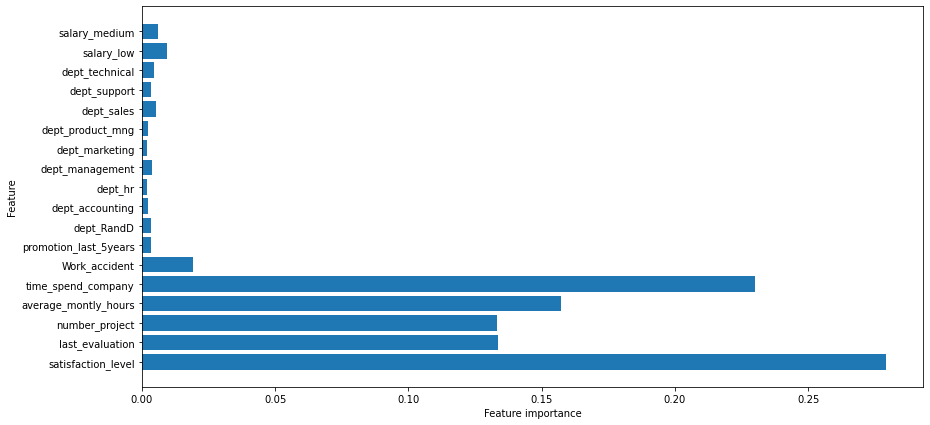

In [60]:
visualize(RFC)

The grapth above shows the level of importance the model places on the varios features during 

training. 
 
As shown above, the model places more importance on satisfaction level,time spend in the company, average mothly hours , number of projects,last evaluation, and work accident.


